# schmier für abm

In [8]:
import xtremes as xx
import xtremes.topt as topt
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
k, r = 100, 100
TS = topt.TimeSeries(n=k*r,distr='GPD',correlation='IID', modelparams=[1,1])
TS.simulate(rep=5)
TS.get_HOS(orderstats=1, block_size=r, stride='ABM')
HOS = topt.HighOrderStats(TS)
HOS.get_ML_estimation(r=1, FrechetOrGEV='Frechet')
HOS.ML_estimators.statistics

{'alpha_mean': 1.0427721449736158,
 'alpha_variance': 0.0046388679090875184,
 'alpha_bias': 0.04782071185224036,
 'alpha_mse': 0.00692568839114252,
 'sigma_mean': 93.77448686345046,
 'sigma_variance': 35.277057152310505}

In [24]:
#TS.get_HOS(orderstats=1, block_size=r, stride='DBM')
TS.high_order_stats[0].reshape(-1,1)

array([[6.76539373],
       [4.45449738],
       [3.84522184],
       [3.76192717],
       [3.74903145],
       [3.7099603 ],
       [3.31491218],
       [3.27514318],
       [3.12546824],
       [3.0522817 ],
       [2.89442045],
       [2.88907562],
       [2.87791508],
       [2.7213482 ],
       [2.64925593],
       [2.63221887],
       [2.59825415],
       [2.51928214],
       [2.26863397],
       [2.22491463],
       [2.22352441],
       [2.13483047],
       [2.12949936],
       [2.04031428],
       [2.02590879],
       [2.01277274],
       [1.93657723],
       [1.8839289 ],
       [1.87345992],
       [1.81981892],
       [1.78748768],
       [1.76574108],
       [1.72033165],
       [1.6809222 ],
       [1.64671909],
       [1.64089756],
       [1.60523956],
       [1.57841273],
       [1.56889614],
       [1.51653598],
       [1.50578423],
       [1.48825484],
       [1.34534743],
       [1.34424526],
       [1.32875788],
       [1.30978538],
       [1.30929837],
       [1.291

In [4]:
arr = [1,2,3,4,5,6,7,8,9,10]

In [5]:
srtd = np.sort(arr)[::-1]

In [6]:
n = len(arr)
m = 3
binom_coeff = comb(n, m, exact=True)
print(binom_coeff)

120


In [7]:
abm = [srtd[i] for i in range(n-m+1)]# for k in range(comb(n-i-1, m-1, exact=True))]
print(abm)

[10, 9, 8, 7, 6, 5, 4, 3]


In [55]:
k, r = 20, 10
TS = topt.TimeSeries(n=k*r,distr='GPD',correlation='IID')
TS.simulate(rep=3)
TS.get_blockmaxima(block_size=r, stride='DBM')
TS.get_HOS(orderstats=k*r, block_size=k*r, stride='DBM')
unique_hos, counts = np.unique(TS.high_order_stats,axis=0, return_counts=True)

In [56]:
counts

array([1, 1, 1])

In [29]:
np.zeros_like(unique_hos[1]).shape

(300, 1)

In [58]:
weights = [comb(k*r-i-1, r-1, exact=True) for i in range(k*r-r+1)]
weights

[1122550215450664,
 1071781612741840,
 1023064266708120,
 976325290056480,
 931494026737560,
 888501994734288,
 847282830030120,
 807772231738560,
 769907908375815,
 733629525258630,
 698878653009537,
 665598717151940,
 633734948777645,
 603234336269630,
 574045578063035,
 546119036427536,
 519406692254450,
 493862100832100,
 469440348593150,
 446098010817800,
 423793110276910,
 402485076799300,
 382134707747650,
 362704129387600,
 344156759134825,
 326457268665034,
 309571547872015,
 293466669659020,
 278110855548955,
 263473442099010,
 249524848105533,
 236236542585120,
 223581013518060,
 211531737340440,
 200063149171380,
 189150613762032,
 178770397153140,
 168899639028120,
 159516325748780,
 150599264060960,
 142128055457531,
 134083071186350,
 126445427890925,
 119196963871700,
 112320215956025,
 105798396965030,
 99615373765775,
 93755645897200,
 88204324758550,
 82947113349100,
 77970286548154,
 73260671924440,
 68805631064170,
 64593041407180,
 60611278580710,
 56849199220528,

In [54]:
np.sort(TS.high_order_stats[0],axis=0)[:,::-1].T

array([[6.76539373e+00],
       [4.45449738e+00],
       [3.84522184e+00],
       [3.76192717e+00],
       [3.74903145e+00],
       [3.70996030e+00],
       [3.31491218e+00],
       [3.27514318e+00],
       [3.12546824e+00],
       [3.05228170e+00],
       [2.89442045e+00],
       [2.88907562e+00],
       [2.87791508e+00],
       [2.72134820e+00],
       [2.64925593e+00],
       [2.63221887e+00],
       [2.59825415e+00],
       [2.51928214e+00],
       [2.26863397e+00],
       [2.22491463e+00],
       [2.22352441e+00],
       [2.13483047e+00],
       [2.12949936e+00],
       [2.04031428e+00],
       [2.02590879e+00],
       [2.01277274e+00],
       [1.93657723e+00],
       [1.88392890e+00],
       [1.87345992e+00],
       [1.81981892e+00],
       [1.78748768e+00],
       [1.76574108e+00],
       [1.72033165e+00],
       [1.68092220e+00],
       [1.64671909e+00],
       [1.64089756e+00],
       [1.60523956e+00],
       [1.57841273e+00],
       [1.56889614e+00],
       [1.51653598e+00],


In [64]:
topt.Frechet_log_likelihood(TS.high_order_stats[0], alpha=0.5, sigma=1, r=1)

-3.9453399089596655

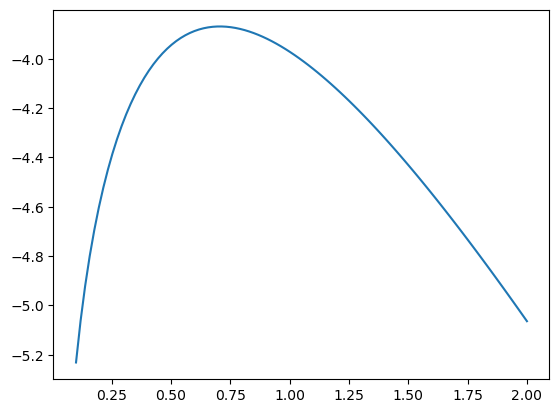

In [65]:
alphas = np.linspace(0.1, 2, 100)
fig = plt.figure()
plt.plot(alphas, [topt.Frechet_log_likelihood(TS.high_order_stats[0], alpha=a, sigma=1, r=1) for a in alphas])
plt.show()